In [1]:
print("Hello Jupyter")

Hello Jupyter


In [5]:
# install dependencies
%pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.4-cp313-cp313-win_amd64.whl (12.6 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 14.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 17.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 9.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 8.7 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.0 MB/s eta 0:00:00


# Product Analysis


Matplotlib is building the font cache; this may take a moment.



Sales Analysis by Category:
            sales_quantity           price customer_rating
                       sum    mean    mean            mean
category                                                  
Books                10308  490.86  477.79            2.99
Clothing             12727  471.37  538.66            2.57
Electronics          13998  583.25  579.96            2.55
Home                 11831  422.54  430.53            2.98

Top 5 Performing Products:
   product_name     category  sales_quantity  customer_rating
35   Product_36  Electronics             981         1.956553
49   Product_50        Books             979         4.072931
97   Product_98     Clothing             979         1.469116
61   Product_62        Books             962         3.318114
45   Product_46  Electronics             959         2.985419

Revenue by Category:
category
Electronics    8.174428e+06
Clothing       6.908317e+06
Home           5.599257e+06
Books          4.496673e+06
Name: revenue, 

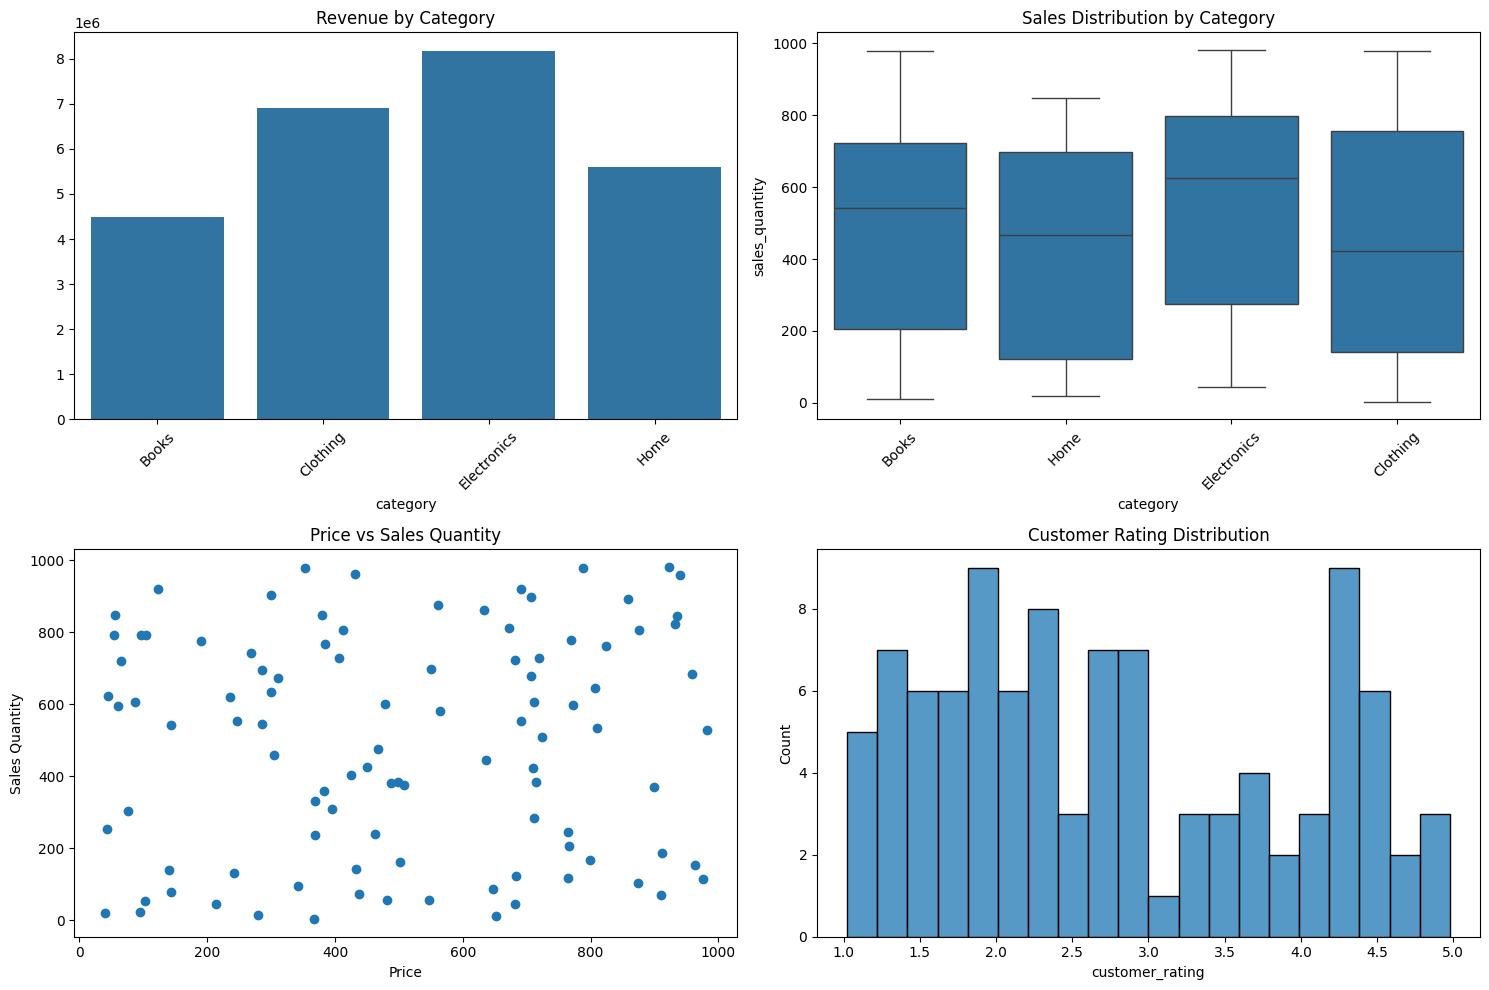

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample product data
data = {
    'product_id': range(1, 101),
    'product_name': [f'Product_{i}' for i in range(1, 101)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], 100),
    'price': np.random.uniform(10, 1000, 100),
    'sales_quantity': np.random.randint(0, 1000, 100),
    'customer_rating': np.random.uniform(1, 5, 100),
    'date': pd.date_range(start='2023-01-01', periods=100)
}

# Create DataFrame
df = pd.DataFrame(data)

# Basic product analysis


def analyze_product_data(df):
    # 1. Sales Analysis
    sales_analysis = df.groupby('category').agg({
        'sales_quantity': ['sum', 'mean'],
        'price': 'mean',
        'customer_rating': 'mean'
    }).round(2)

    # 2. Top performing products
    top_products = df.nlargest(5, 'sales_quantity')[
        ['product_name', 'category', 'sales_quantity', 'customer_rating']
    ]

    # 3. Revenue calculation
    df['revenue'] = df['price'] * df['sales_quantity']
    revenue_by_category = df.groupby(
        'category')['revenue'].sum().sort_values(ascending=False)

    # 4. Customer satisfaction analysis
    rating_distribution = df.groupby(
        'category')['customer_rating'].mean().sort_values(ascending=False)

    return {
        'sales_analysis': sales_analysis,
        'top_products': top_products,
        'revenue_by_category': revenue_by_category,
        'rating_distribution': rating_distribution
    }


# Perform analysis
results = analyze_product_data(df)

# Display results
print("\nSales Analysis by Category:")
print(results['sales_analysis'])

print("\nTop 5 Performing Products:")
print(results['top_products'])

print("\nRevenue by Category:")
print(results['revenue_by_category'])

print("\nAverage Customer Rating by Category:")
print(results['rating_distribution'])

# Visualizations


def plot_product_insights(df):
    plt.figure(figsize=(15, 10))

    # 1. Revenue by Category
    plt.subplot(2, 2, 1)
    sns.barplot(x=df.groupby('category')['revenue'].sum().index,
                y=df.groupby('category')['revenue'].sum().values)
    plt.title('Revenue by Category')
    plt.xticks(rotation=45)

    # 2. Sales Quantity by Category
    plt.subplot(2, 2, 2)
    sns.boxplot(x='category', y='sales_quantity', data=df)
    plt.title('Sales Distribution by Category')
    plt.xticks(rotation=45)

    # 3. Price vs Sales Quantity
    plt.subplot(2, 2, 3)
    plt.scatter(df['price'], df['sales_quantity'])
    plt.xlabel('Price')
    plt.ylabel('Sales Quantity')
    plt.title('Price vs Sales Quantity')

    # 4. Customer Rating Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='customer_rating', bins=20)
    plt.title('Customer Rating Distribution')

    plt.tight_layout()
    plt.show()


# Generate visualizations
plot_product_insights(df)